In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets
import sklearn.neural_network

import warnings
# Suppress LinAlgWarning
warnings.filterwarnings('ignore', message="Ill-conditioned matrix")
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', message="Liblinear failed to converge, increase")

In [179]:
Network_data = pd.read_csv("Train_data.csv")

In [181]:
Network_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,0,tcp,exec,RSTO,0,0,0,0,0,0,...,7,0.03,0.06,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
25188,0,tcp,ftp_data,SF,334,0,0,0,0,0,...,39,1.00,0.00,1.00,0.18,0.00,0.00,0.00,0.00,anomaly
25189,0,tcp,private,REJ,0,0,0,0,0,0,...,13,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
25190,0,tcp,nnsp,S0,0,0,0,0,0,0,...,20,0.08,0.06,0.00,0.00,1.00,1.00,0.00,0.00,anomaly


In [183]:
X = Network_data.iloc[:,0:40]

In [203]:
X_poly = sklearn.preprocessing.PolynomialFeatures(degree=2).fit_transform(X)

In [205]:
X_mix_poly, X_test_poly, Y_mix_poly, Y_test_poly = sklearn.model_selection.train_test_split(
    X_poly, Y, test_size=0.2, shuffle=True, random_state=0,
)

X_train_poly, X_validation_poly, Y_train_poly, Y_validation_poly = sklearn.model_selection.train_test_split(
    X_mix_poly, Y_mix_poly, test_size = 0.25, shuffle = True, random_state = 0,
)

In [16]:
unique_rows = X['protocol_type'].unique()
print(unique_rows)

['tcp' 'udp' 'icmp']


In [185]:
#Encodes protocol type

X.loc[X['protocol_type'] == 'tcp', 'protocol_type'] = 1
X.loc[X['protocol_type'] == 'udp', 'protocol_type'] = 0
X.loc[X['protocol_type'] == 'icmp', 'protocol_type'] = -1

In [187]:
X['udp'] = (X['protocol_type'] == -1).astype(int)
X['tcp'] = (X['protocol_type'] == 1).astype(int)
X['icmp'] = (X['protocol_type'] == 0).astype(int)

In [189]:
X.drop(columns=['protocol_type'], inplace=True)

In [191]:
#Encodes Service

X.loc[X['service'].isin(['ssh', 'http_443', 'imap4', 'domain_u', 'domain', 'ldap', 'echo', 'printer', 'time', 'whois', 'efs', 'name']), 'service'] = 0
X.loc[X['service'].isin(['telnet', 'ftp', 'ftp_data', 'smtp', 'http', 'pop_2', 'pop_3', 'exec', 'login', 'shell', 'kshell', 'netbios_ns', 'netbios_dgm', 'iso_tsap', 'eco_i', 'ecr_i', 'urp_i', 'X11', 'sunrpc', 'uucp', 'uucp_path', 'sql_net', 'pm_dump', 'ctf', 'red_i', 'rje', 'discard', 'systat', 'gopher', 'finger', 'daytime', 'vmnet', 'auth', 'bgp', 'other', 'private', 'remote_job', 'mtp', 'supdup', 'Z39_50', 'csnet_ns', 'efs', 'klogin', 'link', 'hostnames', 'ntp_u', 'nntp', 'courier', 'netstat', 'nnsp', 'IRC', 'tim_i', 'netbios_ssn', 'urh_i', 'http_8001']), 'service'] = 1

In [193]:
#Encodes Flag

X.loc[X['flag'].isin(['SF', 'RSTO', 'RSTOS0', 'OTH']), 'flag'] = 0
X.loc[X['flag'].isin(['SH', 'S0', 'S2', 'REJ', 'S3', 'S1', 'RSTR']), 'flag'] = 1

In [195]:
Y = Network_data.iloc[:,41]

In [ ]:
for i in range(len(Y)):
    if Y[i] == 'anomaly':
        Y[i] = 1
    elif Y[i] == 'normal':
        Y[i] = 0

In [199]:
X = X.astype(float)
Y = Y.astype(float)

In [201]:
X_mix, X_test, Y_mix, Y_test = sklearn.model_selection.train_test_split(
    X, Y, test_size=0.2, shuffle=True, random_state=0,
)

X_train, X_validation, Y_train, Y_validation = sklearn.model_selection.train_test_split(
    X_mix, Y_mix, test_size = 0.25, shuffle = True, random_state = 0,
)

In [30]:
import sklearn.linear_model

eta = [1000000,100000,10000,1000,100,10,1,0.1,0.01,0.001,0.0001,0.00001,0.000001,0.0000001]

accuracy = np.zeros(len(eta))

for i in range(len(eta)):
    perceptron = sklearn.linear_model.Perceptron(eta0=eta[i])
    perceptron.fit(X_train, Y_train)
    perceptron_model = perceptron.predict(X_validation)

    accuracy[i] = np.sum(Y_validation == perceptron_model)
    
print(eta[np.argmax(accuracy)])
print("Accuracy equals:", accuracy[np.argmax(accuracy)]/len(Y_validation)*100, "%")

1000000
Accuracy equals: 31.474498908513592 %


In [207]:
#linear regression model
lambds = np.exp(np.linspace(-20, 5, 50))

accuracy = np.zeros(len(lambds))

for i in range(len(lambds)):
    reg = sklearn.linear_model.Ridge(alpha = lambds[i])
    reg.fit(X_train,Y_train)
    predictions = reg.predict(X_validation)

    for j in range(len(predictions)):
        if predictions[j] >= 0.5:
            predictions[j] = 1
        elif predictions[j] < 0.5:
            predictions[j] = 0

    accuracy[i] = np.sum(Y_validation == predictions)

print(lambds[np.argmax(accuracy)])
print("Accuracy equals:", np.max(accuracy)/len(Y_validation)*100, "%")

0.1954104499097265
Accuracy equals: 94.76086525104186 %


In [209]:
#polynomial regression model
import numpy as np
from sklearn.linear_model import Ridge

# Define tolerance (adjust this value as needed)

lambds = np.exp(np.linspace(-20, 5, 50))
accuracy = np.zeros(len(lambds))

for i in range(len(lambds)):
    reg = Ridge(alpha=lambds[i])
    reg.fit(X_train_poly, Y_train_poly)
    predictions = reg.predict(X_validation_poly)

    # Calculate accuracy based on tolerance
    for j in range(len(predictions)):
        if predictions[j] >= 0.5:
            predictions[j] = 1
        elif predictions[j] < 0.5:
            predictions[j] = 0

    accuracy[i] = np.sum(Y_validation_poly == predictions)

best_lambda = lambds[np.argmax(accuracy)]
best_accuracy = (np.max(accuracy)/len(Y_validation_poly))*100

print("Best lambda:", best_lambda)
print("Accuracy:", best_accuracy, "%")


Best lambda: 0.0007138069865119686
Accuracy: 99.14665608255606 %


In [211]:
reg = Ridge(alpha=9.27396655140094e-05)
reg.fit(X_train_poly, Y_train_poly)
predictions = reg.predict(X_test_poly)

for j in range(len(predictions)):
    if predictions[j] >= 0.5:
        predictions[j] = 1
    elif predictions[j] < 0.5:
        predictions[j] = 0

correct_predictions = np.sum(Y_test_poly == predictions)
accuracy = (correct_predictions/len(Y_test_poly)) * 100

print(accuracy)

98.96804921611431


In [ ]:
import sklearn.cluster

n = np.linspace(1, 40, 40, dtype = 'int')


accuracy = np.zeros(len(n))

for j in range(len(n)):
    kmeans = sklearn.cluster.KMeans(n_clusters = n[j])
    kmeans.fit(X_train)
    kernel_svm_model = kmeans.predict(X_validation)
    kernel_svm_model_2 = kmeans.predict(X_test)
    for i in range(n[j]):
        if np.average(Y_validation[kernel_svm_model==i]) > 0.5:
            kernel_svm_model[kernel_svm_model == i] = 1
            kernel_svm_model_2[kernel_svm_model_2 == kernel_svm_model[i]] = 1
        elif np.average(Y_validation[kernel_svm_model==i]) <= 0.5:
            kernel_svm_model[kernel_svm_model == i] = 0
            kernel_svm_model_2[kernel_svm_model_2 == kernel_svm_model[i]] = 0

    accuracy[j] = ((np.sum(Y_test == kernel_svm_model_2))/len(Y_test))*100

Text(0.5, 1.0, 'testing various cluster numbers and accuracy')

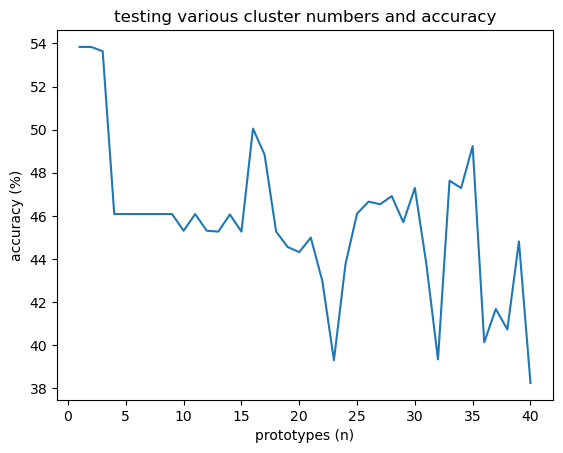

In [167]:
plt.plot(n, accuracy)
plt.xlabel("prototypes (n)")
plt.ylabel("accuracy (%)")
plt.title("testing various cluster numbers and accuracy")

In [215]:
cost = [1000000,100000,10000,1000,100,10,1,0.1,0.01,0.001,0.0001,0.00001,0.000001,0.0000001]

accuracy = np.zeros(len(cost))

for i in range(len(cost)):
    svm = sklearn.svm.LinearSVC(C=cost[i])
    svm.fit(X_train, Y_train)
    linear_svm_model = svm.predict(X_validation)

    accuracy[i] = np.sum(Y_validation == linear_svm_model)

print(cost[np.argmax(accuracy)])
np.max(accuracy)/len(Y_validation)*100

0.01


95.09823377654297

([<matplotlib.axis.YTick at 0x2657b29c3e0>,
 [Text(0, 0, '0.001'),
  Text(0, 3, '0.01'),
  Text(0, 6, '0.1'),
  Text(0, 9, '1.0'),
  Text(0, 12, '10.0'),
  Text(0, 15, '100.0'),
  Text(0, 18, '1000.0'),
  Text(0, 21, '10000.0'),
  Text(0, 24, '100000.0')])

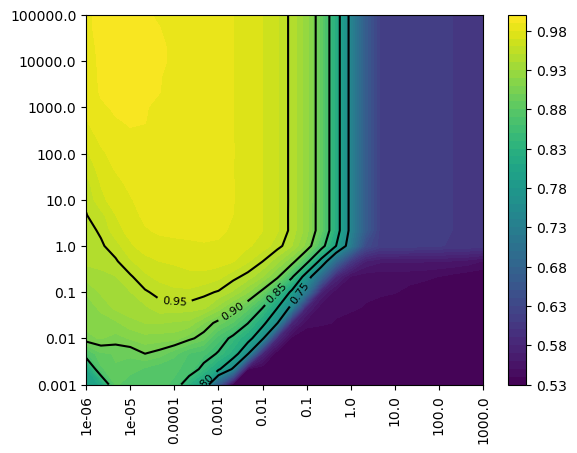

In [324]:
Cs = np.logspace(-3, 5, 25)
gammas = np.logspace(-6, 3, 28)

accuracy = np.zeros((len(Cs),len(gammas)))

for i in range(len(Cs)):
    for j in range(len(gammas)):
        svm = sklearn.svm.SVC(kernel='rbf', gamma=gammas[j], C=Cs[i])
        svm.fit(X_train, Y_train)
        svm_model = svm.predict(X_validation)
        
        accuracy[i,j] = (np.sum(Y_validation == svm_model)/len(Y_validation))

#print(cost[np.argmax(accuracy)])
#np.max(accuracy)/len(Y_validation)*100

XX, YY = np.meshgrid(np.arange(len(gammas)), np.arange(len(Cs)))
plt.contourf(XX, YY, accuracy, levels=50)
plt.colorbar()
CS = plt.contour(XX, YY, accuracy, levels=[0,0.75,0.8,0.85, 0.9, 0.95], colors='k')
plt.clabel(CS, CS.levels, inline=True, fontsize=8)
plt.xticks(np.arange(len(gammas))[::3], gammas[::3], rotation=90)
plt.yticks(np.arange(len(Cs))[::3], Cs[::3])

In [46]:
svm = sklearn.svm.SVC(kernel='rbf', gamma=0.000001, C=10000)
svm.fit(X_train, Y_train)
svm_model = svm.predict(X_validation)

In [52]:
accuracy = (np.sum(Y_validation == svm_model)/len(Y_validation))
print(accuracy)

0.9855129986108355
